In [1]:
%matplotlib notebook
import csv
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = loadmat('ex5data1.mat')
y = data['y']
x = data['X']
yval = data['yval']
xval = data['Xval']
ytest = data['ytest']
xtest = data['Xtest']
th = np.ones((2,1))
x = np.insert(x,0,np.ones(len(x)),axis=1)
xval = np.insert(xval,0,np.ones(len(xval)),axis=1)

In [3]:
def coste(th,x,y,reg = 0):
    m = x.shape[0]
    return (1/(2*m)) * np.sum(np.square(np.dot(x,th) - y)) + (reg/(2*m)) * np.sum(np.square(th[1:])) 
coste(th,x,y)

303.9515255535976

In [4]:
def gradiente(th,x,y,reg=0):
    t0 = np.sum((np.ravel(np.dot(x, th)-y)) * x[:,0])/len(x)
    t1 = np.sum((np.dot(x, th)-y) * x[:,1:])/len(x) + reg * np.ravel(th[1:])/len(x)
    return np.append(t0,t1)
gradiente(th,x,y)

array([-15.30301567, 598.16741084])

In [5]:
def linearRegCostFunction(theta, X, y, reg):
    m = len(y)
    h = np.matmul(X, theta[:, None])

    tt = np.copy(theta)
    tt[0] = 0
    cost = (np.sum((h - y) ** 2)) / (2 * m) + (reg / (2 * m)) * np.sum(tt ** 2)
    gradients = (np.sum((h - y) * X, axis=0) / m) + (reg / m) * tt

    return (cost, gradients)

In [6]:
def trainLinearReg(X, y, reg):
    initial_theta = np.zeros(np.size(X, 1))
    res = opt.minimize(fun=linearRegCostFunction,x0=initial_theta,args=(X,y,reg),jac=True,method='TNC',options={'maxiter':400,'disp':True})
    return res.x

In [7]:
peso = trainLinearReg(x,y,0)

<IPython.core.display.Javascript object>


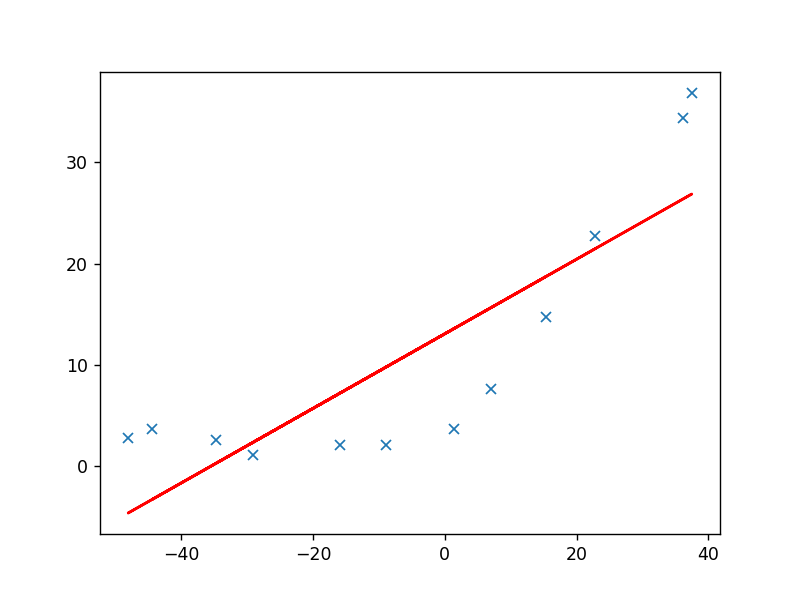

In [92]:
plt.figure()
plt.plot(x[:,1], y, 'x')
plt.plot(x[:,1],peso[0]+peso[1]*x[:,1],"r")


In [13]:
pesos = []
error = []
val = []
for i in range(len(x)):
    pesos.append(trainLinearReg(x[0:i+1],y[0:i+1],0))
    error.append(np.sum(np.square(np.dot(x[0:i+1],pesos[i]) - np.ravel(y[0:i+1])))/(2*(i+1)))
    val.append(np.sum(np.square(np.dot(xval,pesos[i]) - np.ravel(yval)))/(2*len(xval)))

<IPython.core.display.Javascript object>


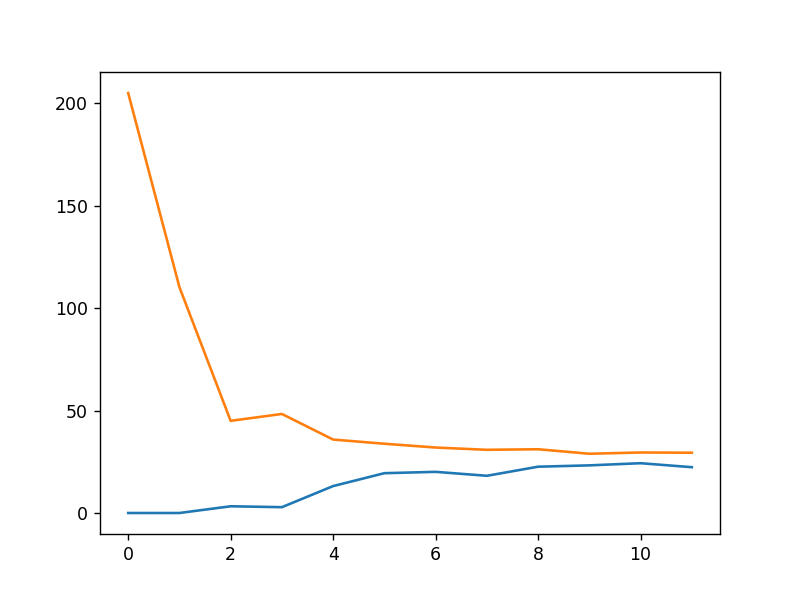

In [93]:
plt.figure()
plt.plot(range(len(x)),error)
plt.plot(range(len(x)),val)

In [82]:
def new_data(X, p):
    data = np.copy(X)
    for i in range(p-1):
        data = np.insert(data, data.shape[1], X[:,0] ** (i+2), axis=1)        
    return data

In [83]:
def norm_new_data(X):
    media = np.empty([1, X.shape[1]])
    desv = np.empty([1, X.shape[1]])
    norm = np.copy(X)
    for i in range(X.shape[1]):
        media[0,i] = np.mean(X[:,i])
        desv[0,i] = np.std(X[:,i])
        norm[:,i] = (X[:,i] - media[0,i]) / desv[0,i]
    return norm, media, desv

In [103]:
data = new_data(x[:,1].reshape((x.shape[0],1)), 8)
norm_data, media, desv = norm_new_data(data)
norm_data = np.insert(norm_data, 0, np.ones(norm_data.shape[0]), axis=1)
norm_data

array([[ 1.00000000e+00, -3.78243704e-01, -7.88662325e-01,
         1.90328720e-01, -7.37591303e-01,  3.20251970e-01,
        -6.17151602e-01,  3.59835014e-01, -5.31091256e-01],
       [ 1.00000000e+00, -8.38920100e-01,  1.31420204e-03,
        -2.58961742e-01, -3.41564822e-01,  9.75492734e-02,
        -4.55196644e-01,  2.66773432e-01, -4.68873807e-01],
       [ 1.00000000e+00,  1.43871736e+00,  6.10831582e-01,
         1.30534069e+00,  2.56220001e-01,  1.02186338e+00,
        -1.26962121e-02,  7.90210009e-01, -1.77926980e-01],
       [ 1.00000000e+00,  1.48412330e+00,  7.38068463e-01,
         1.42031240e+00,  4.13121830e-01,  1.15534830e+00,
         1.31223708e-01,  9.10700224e-01, -6.22895388e-02],
       [ 1.00000000e+00, -1.49791929e+00,  1.93643966e+00,
        -2.12774745e+00,  2.43510061e+00, -2.51876748e+00,
         2.71792174e+00, -2.76331690e+00,  2.88908182e+00],
       [ 1.00000000e+00, -1.34409278e-01, -1.01936614e+00,
         2.62563148e-01, -7.72577738e-01,  3.310465

In [104]:
peso_norm = trainLinearReg(norm_data,y,0)
peso_norm

array([ 11.2175934 ,   9.16761144,  18.24455476,  28.56471938,
       -27.64774278, -73.45252424,   7.7409179 ,  59.83623793,
        19.85049146])

In [114]:
np.multiply(peso_norm, norm_data)
np.arange(min(x[:,1]), max(x[:,1]), 0.05) #esto hace falta pero no sé dónde

(9,)

In [123]:
x_muestra = np.arange(min(x[:,1]), max(x[:,1]), 0.05)
y_muestra = []
for i in range(x_muestra.shape[0]):
    y_muestra.append(np.sum(peso_norm * x_muestra[i]))
muestra

array([-48.05882945, -48.00882945, -47.95882945, ...,  37.39117055,
        37.44117055,  37.49117055])

<IPython.core.display.Javascript object>


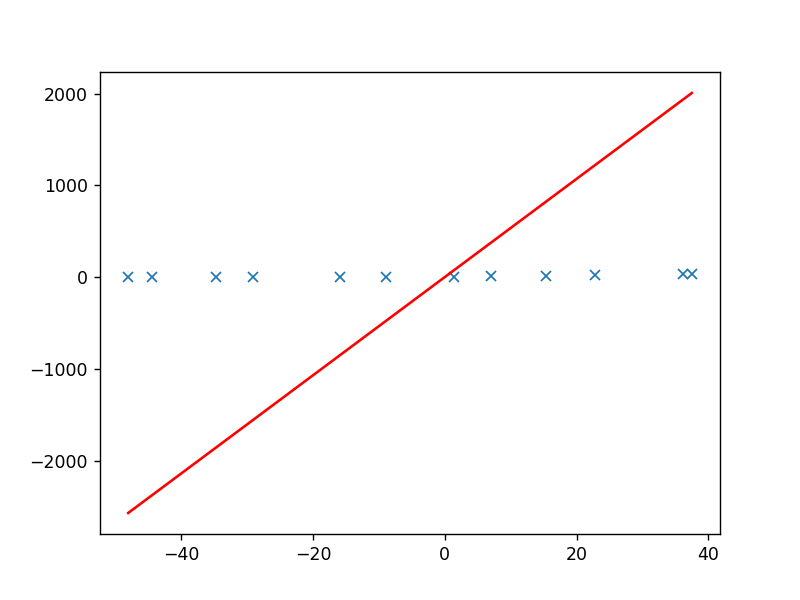

In [126]:
plt.figure()
plt.plot(x[:,1], y, 'x')
plt.plot(x_muestra, y_muestra,"r")